<a href="https://colab.research.google.com/github/LAKSHYAMEWARA0025/ML/blob/main/ModelTrainLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
file=pd.read_csv('/content/Jamboree.csv')

In [ ]:
file.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
file.drop(columns="Serial No.",inplace=True)

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
file.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#Problem Statement, we need to find the chance of admission based on these various factors, hence y=Chance of Admit
#Linear Regression will be used to predict it

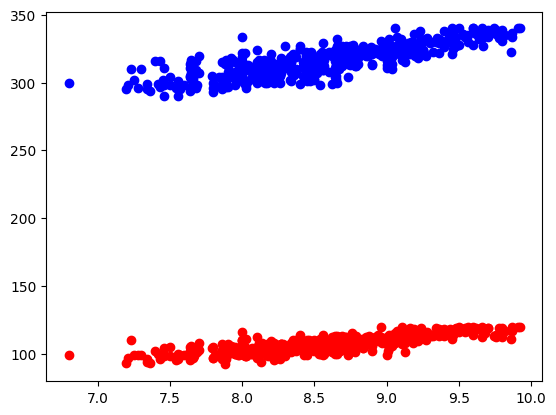

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(file['CGPA'],file['GRE Score'],color='blue')
plt.scatter(file['CGPA'],file['TOEFL Score'],color='red')

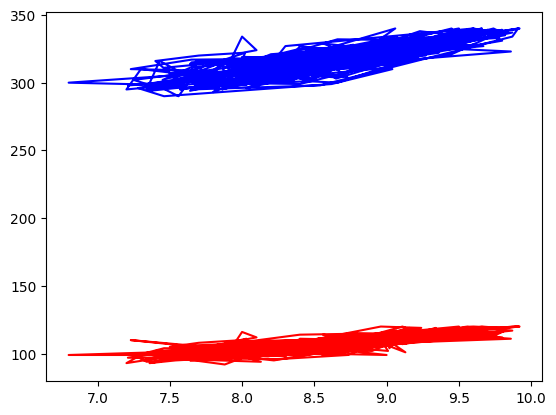

In [ ]:
plt.plot(file['CGPA'],file['GRE Score'],color='blue')
plt.plot(file['CGPA'],file['TOEFL Score'],color='red')

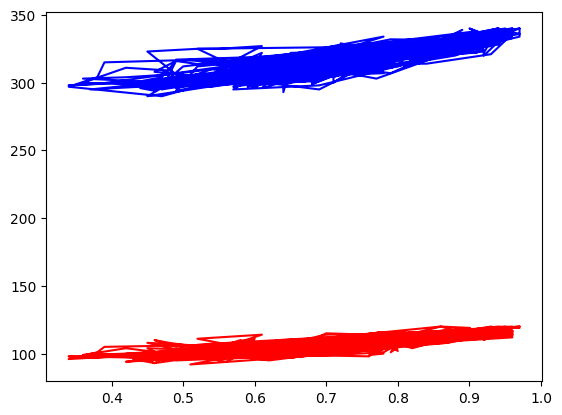

In [ ]:
plt.plot(file['Chance of Admit '],file['GRE Score'],color='blue')
plt.plot(file['Chance of Admit '],file['TOEFL Score'],color='red')

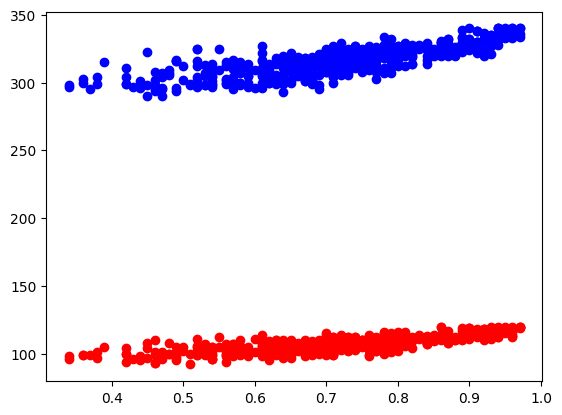

In [ ]:
plt.scatter(file['Chance of Admit '],file['GRE Score'],color='blue')
plt.scatter(file['Chance of Admit '],file['TOEFL Score'],color='red')

In [ ]:
file.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#Steps:-Firs we will do scaling then for one time will do train test split and will create the model
#after it we will do rfe
#and will check multicolinearity

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=file.drop(columns='Chance of Admit ')
y=file['Chance of Admit ']
scaler=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)#yha per sequence x_train and all ka same rahega
#isse kya hoga abhi tkk apan ne poore ke poore dataset ko 25% test 0r 75% train set mein baatdiya haii!

In [ ]:
#ab hum uski scaling karenge
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
#we do not need to transform y_train and y_test as it is generally not needed in LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
#yha per hum xtest dekr jo bhii model kii prediction haii wo ypred me predict krke store kar rahe haii

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8163213016062119

In [ ]:
#now we will do recursive feature elimination and OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()#this creates a whole new dataframe and gives it to vif
vif['features']=X.columns # Use X.columns here because you calculated VIF on x_train, which came from X.
#after transforming the data in StandardScaler.fit_transform(), it returns a numpy  array and not dataframe
vif['VIF']=[variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
5,CGPA,4.67
0,GRE Score,4.57
1,TOEFL Score,3.64
3,SOP,2.77
2,University Rating,2.65
4,LOR,1.98
6,Research,1.53


In [ ]:
#now after watching the vif values, it can be seen that there is  not much need of vif, now lets do rfe
from sklearn.feature_selection import RFE
rfe=RFE(model,n_features_to_select=6)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [ ]:
x_train_rfe=X.columns[rfe.support_]
#this is selecting all the columns from our X dataFrame which were selected by our rfe model

In [ ]:
import statsmodels.api as sm
# x_train_sm=sm.add_constant(x_train_rfe)
x_train_sm=sm.add_constant(x_train[:,rfe.support_])
lr_1=sm.OLS(y_train,x_train_sm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     283.9
Date:                Fri, 12 Sep 2025   Prob (F-statistic):          1.00e-134
Time:                        10:08:35   Log-Likelihood:                 525.49
No. Observations:                 375   AIC:                            -1037.
Df Residuals:                     368   BIC:                            -1010.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7237      0.003    232.966      0.0

In [ ]:
#now from the data we can see that the p-value of universities is 0.5 which is more than
#0.05, hence we can try to remve it up and re-train the model
df=file.copy()
df.drop(columns='University Rating',inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_new=df.drop(columns='Chance of Admit ')
y_new=df['Chance of Admit ']
scaler=StandardScaler()
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(X_new,y_new,test_size=0.25,random_state=42)

In [ ]:
x_train_1=scaler.fit_transform(x_train_1)
x_test_1=scaler.transform(x_test_1)

In [ ]:
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()
model_1.fit(x_train_1,y_train_1)

LinearRegression()

In [ ]:
y_pred_1=model_1.predict(x_test_1)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_1,y_pred_1)

0.8143633383530936

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_new=pd.DataFrame()#this creates a whole new dataframe and gives it to vif
vif_new['features']=X_new.columns # Use X.columns here because you calculated VIF on x_train, which came from X.
#after transforming the data in StandardScaler.fit_transform(), it returns a numpy  array and not dataframe
vif_new['VIF']=[variance_inflation_factor(x_train_1,i) for i in range(x_train_1.shape[1])]
vif_new['VIF']=round(vif['VIF'],2)
vif_new=vif_new.sort_values(by='VIF',ascending=False)
vif_new

,features,VIF
5,Research,4.67
0,GRE Score,4.57
1,TOEFL Score,3.64
3,LOR,2.77
2,SOP,2.65
4,CGPA,1.98


In [ ]:
from sklearn.feature_selection import RFE
rfe=RFE(model_1,n_features_to_select=5)
rfe.fit(x_train_1,y_train_1)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [ ]:
x_train_1_rfe=X_new.columns[rfe.support_]
x_train_1_rfe

Index(['GRE Score', 'TOEFL Score', 'LOR ', 'CGPA', 'Research'], dtype='object')

In [ ]:
import statsmodels.api as sm
# x_train_sm=sm.add_constant(x_train_rfe)
x_train_sm_1=sm.add_constant(x_train_1[:,rfe.support_])
lr_2=sm.OLS(y_train_1,x_train_sm_1).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     341.1
Date:                Fri, 12 Sep 2025   Prob (F-statistic):          6.41e-136
Time:                        10:08:36   Log-Likelihood:                 525.27
No. Observations:                 375   AIC:                            -1039.
Df Residuals:                     369   BIC:                            -1015.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7237      0.003    233.145      0.0

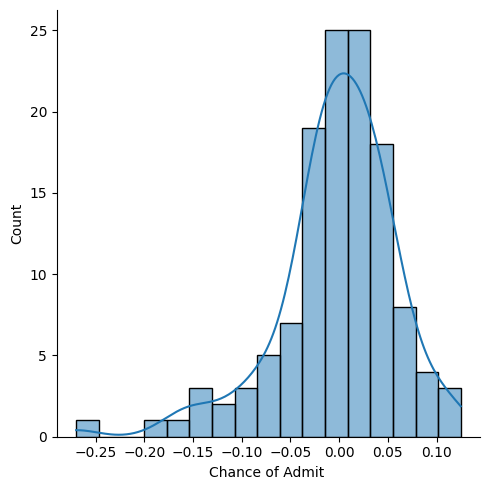

In [ ]:
import seaborn as sns
sns.displot(y_test_1-y_pred_1,kde=True)

In [ ]:
#ask sir what to do next!!

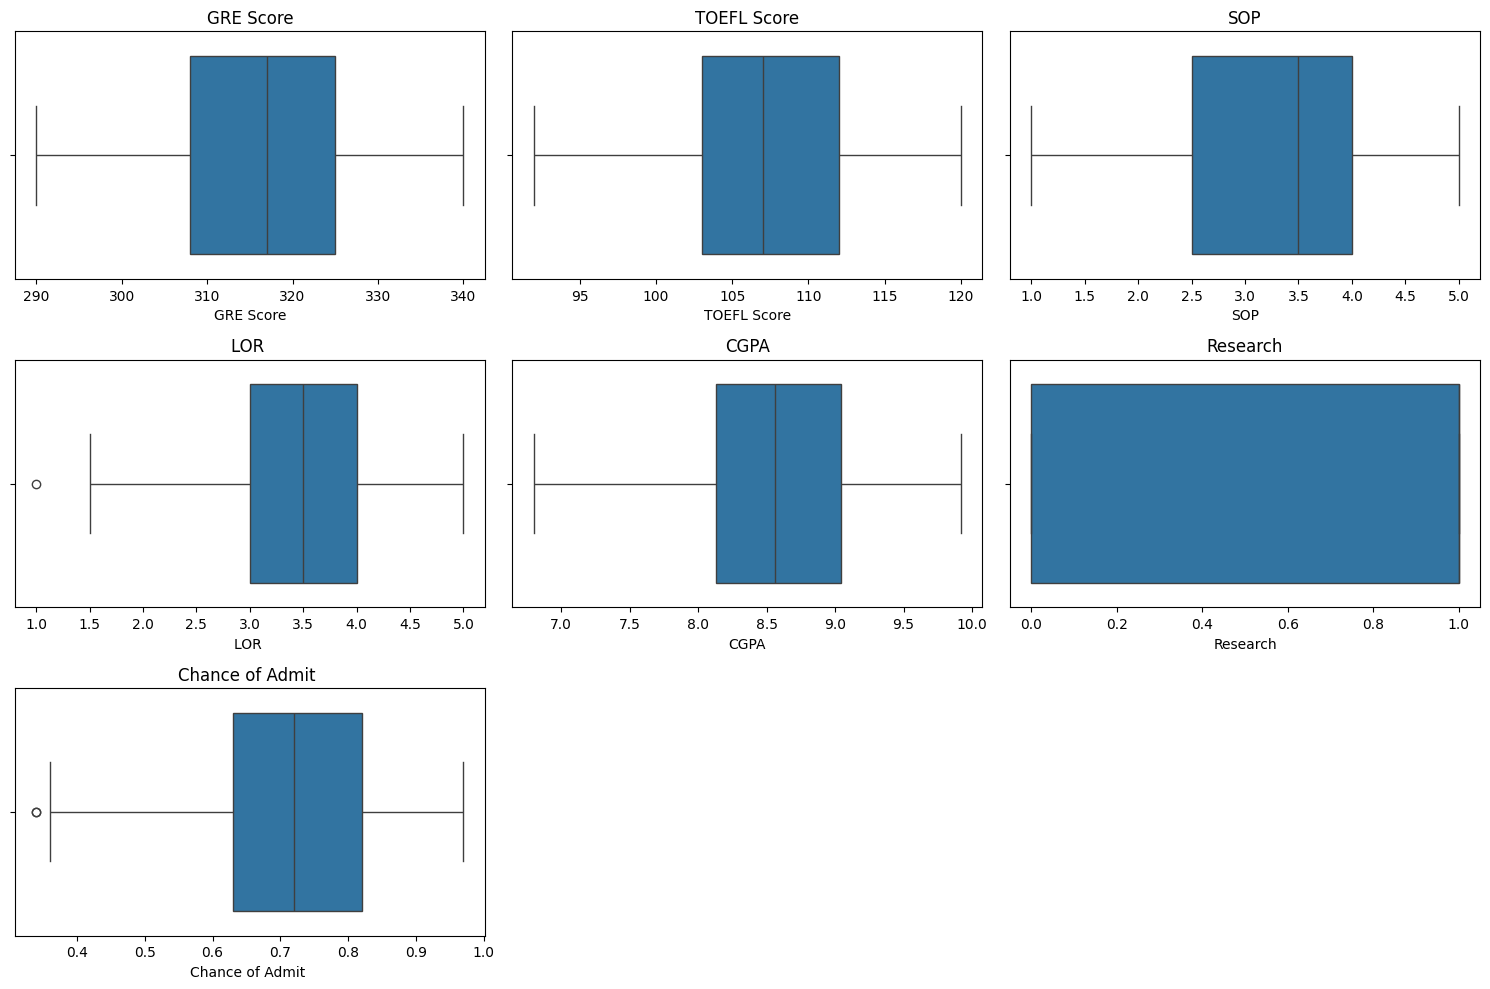

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each feature to visualize outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()